In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools

In [2]:
#Define the transverse momentum probability distribution
pT_sample=np.arange(0.2,5,0.05)
prob_pT=np.exp(-0.2*pT_sample)
prob_pT=prob_pT/np.sum(prob_pT)

In [3]:
#function to return pairwise unique combinations of elements of a list
def unique_combinations(elements):
    return list(itertools.combinations(elements, 2))

In [4]:
m_pi= 0.14
np.random.seed(1)
events=10000

#multiplicity
mult= np.random.normal(5,1,events)
mult= abs(mult.astype(int))

E_g=[]
p_gx=[]
p_gy=[]
p_gz=[]
m_inv=[]

for i in range(events):
    #sample from the previously defined probability distribution
    pT=np.random.choice(pT_sample,mult[i],p=prob_pT)
    rapidity=np.random.normal(0,2,mult[i])
    
    theta= 2*np.arctan(np.exp(-rapidity))
    #uniform phi distribution for emitted pions
    phi=np.random.uniform(0,2*np.pi,mult[i])
    
    mod_p= np.abs(pT/np.sin(theta))
    p_z= mod_p*np.cos(theta)
    p_x= mod_p*np.sin(theta)*np.cos(phi)
    p_y=mod_p*np.sin(theta)*np.sin(phi)
    
    gamma=np.sqrt(1+mod_p**2/m_pi**2)
    
    #gamma*beta
    gbx=p_x/m_pi
    gby=p_y/m_pi
    gbz=p_z/m_pi
    
    #beta
    bx=1/np.sqrt(1+m_pi**2/p_x**2)
    by=1/np.sqrt(1+m_pi**2/p_y**2)
    bz=1/np.sqrt(1+m_pi**2/p_z**2)
    
    b_sq=bx**2+by**2+bz**2
    
    #lorentz=np.array([[gamma,-gbx,-gby,-gbz],
                     #[-gbx,1+(gamma-1)*bx**2/b_sq,(gamma-1)*bx*by/b_sq,(gamma-1)*bx*bz/b_sq],
                    #[-gby,(gamma-1)*by*bx/b_sq, 1+(gamma-1)*by**2/b_sq, (gamma-1)*by*bz/b_sq],
                    #[-gbz, (gamma-1)*bx*bz/b_sq, (gamma-1)*by*bz/b_sq, 1+(gamma-1)*bz**2/b_sq]],dtype=object)
    
    #in COM frame of pion, distribution of emitted photons
    theta_com=np.arccos(np.random.uniform(-1,1,mult[i]))
    phi_com=np.random.uniform(0,2*np.pi,mult[i])
    
    #momentum 4 vectors of the 2 photons in pion COM frame
    E=m_pi/2
    p1_com=[E,
            E*np.sin(theta_com)*np.cos(phi_com),
            E*np.sin(theta_com)*np.sin(phi_com),
            E*np.cos(theta_com)]
    p2_com=[E,
            -E*np.sin(theta_com)*np.cos(phi_com),
            -E*np.sin(theta_com)*np.sin(phi_com),
            -E*np.cos(theta_com)]
    
    #momentum 4 vectors of the 2 photons in lab frame
    pg1=[gamma*p1_com[0]+gbx*p1_com[1]+gby*p1_com[2]+gbz*p1_com[3], 
        gbx*p1_com[0]+(1+(gamma-1)*bx**2/b_sq)*p1_com[1]+((gamma-1)*bx*by/b_sq)*p1_com[2]+((gamma-1)*bx*bz/b_sq)*p1_com[3],
        gby*p1_com[0]+((gamma-1)*bx*by/b_sq)*p1_com[1]+(1+(gamma-1)*by**2/b_sq)*p1_com[2]+((gamma-1)*by*bz/b_sq)*p1_com[3],
        gbz*p1_com[0]+((gamma-1)*bx*bz/b_sq)*p1_com[1]+((gamma-1)*by*bz/b_sq)*p1_com[2]+(1+(gamma-1)*bz**2/b_sq)*p1_com[3]]
    
    pg2=[gamma*p2_com[0]+gbx*p2_com[1]+gby*p2_com[2]+gbz*p2_com[3], 
        gbx*p2_com[0]+(1+(gamma-1)*bx**2/b_sq)*p2_com[1]+((gamma-1)*bx*by/b_sq)*p2_com[2]+((gamma-1)*bx*bz/b_sq)*p2_com[3],
        gby*p2_com[0]+((gamma-1)*bx*by/b_sq)*p2_com[1]+(1+(gamma-1)*by**2/b_sq)*p2_com[2]+((gamma-1)*by*bz/b_sq)*p2_com[3],
        gbz*p2_com[0]+((gamma-1)*bx*bz/b_sq)*p2_com[1]+((gamma-1)*by*bz/b_sq)*p2_com[2]+(1+(gamma-1)*bz**2/b_sq)*p2_com[3]]
    
    #add energy resolution such that p_det=E_det as this is always true fro photons
    E1_det= np.random.normal(loc=pg1[0],scale=0.05*pg1[0])
    p1_det= pg1[1:]*E1_det/pg1[0]
    
    E2_det= np.random.normal(loc=pg2[0],scale=0.05*pg2[0])
    p2_det= pg2[1:]*E2_det/pg2[0]
    
    #As we don't know which photon came from which pion, concatenate and take pairwise unique combinations
    
    E_gamma=np.concatenate((E1_det,E2_det))
    p_detx=np.concatenate((p1_det[0],p2_det[0]))
    p_dety=np.concatenate((p1_det[1],p2_det[1]))
    p_detz=np.concatenate((p1_det[2],p2_det[2]))
    
    E_pair=np.transpose(unique_combinations(E_gamma))
    px_pair=np.transpose(unique_combinations(p_detx))
    py_pair=np.transpose(unique_combinations(p_dety))
    pz_pair=np.transpose(unique_combinations(p_detz))
    
    #Reconstruct invariant mass for all these possible pairs
    
    m_inv.append(np.sqrt((E_pair[0]+E_pair[1])**2-(px_pair[0]+px_pair[1])**2-(py_pair[0]+py_pair[1])**2-(pz_pair[0]+pz_pair[1])**2))
    
    #Append into the list for every event for future analysis
    
    E_g.append(E_gamma)
    p_gx.append(p_detx)
    p_gy.append(p_dety)
    p_gz.append(p_detz)
    


<ipython-input-4-a0c0e7f856c6>:95: RuntimeWarning: invalid value encountered in sqrt
  m_inv.append(np.sqrt((E_pair[0]+E_pair[1])**2-(px_pair[0]+px_pair[1])**2-(py_pair[0]+py_pair[1])**2-(pz_pair[0]+pz_pair[1])**2))


In [5]:
#flatten the list of lists of invariant mass and limit range
from pandas.core.common import flatten
sig_bg=np.array(list(flatten(m_inv)))
sig_bg=sig_bg[np.logical_not(np.isnan(sig_bg))]
sig_bg=sig_bg[sig_bg<2]

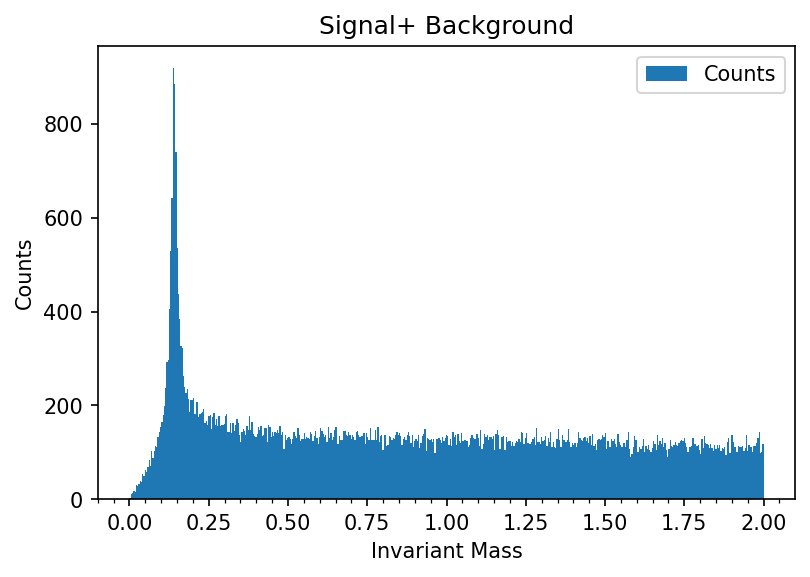

In [6]:
plt.figure(dpi=150)
bins=np.linspace(0,2,500)
counts_sg,bins,ignored= plt.hist(sig_bg,bins, label='Counts')

plt.xlabel('Invariant Mass')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)
#plt.ylim(0,750)
#plt.xlim(0,5)

plt.title('Signal+ Background')
plt.legend()
plt.show()

In [7]:
np.random.seed(2)
E_samp=[]
px_samp=[]
py_samp=[]
pz_samp=[]

#sample a random photon from every 10th event

for i in range(0,events,10):
    rand_index=np.random.randint(0,2*mult[i])
    E_samp.append(E_g[i][rand_index])
    px_samp.append(p_gx[i][rand_index])
    py_samp.append(p_gy[i][rand_index])
    pz_samp.append(p_gz[i][rand_index])

#Generate all possible pairs from this sample. As each sample is from a different event, every pair is uncorrelated

E_uncor= np.transpose(unique_combinations(E_samp))
px_uncor= np.transpose(unique_combinations(px_samp))
py_uncor= np.transpose(unique_combinations(py_samp))
pz_uncor= np.transpose(unique_combinations(pz_samp))

#Reconstruct background distribution from these pairs

bg= np.sqrt((E_uncor[0]+E_uncor[1])**2-(px_uncor[0]+px_uncor[1])**2-(py_uncor[0]+py_uncor[1])**2-(pz_uncor[0]+pz_uncor[1])**2)
bg=bg[np.logical_not(np.isnan(bg))]
bg= bg[bg<2]

<ipython-input-7-68a2497433bb>:25: RuntimeWarning: invalid value encountered in sqrt
  bg= np.sqrt((E_uncor[0]+E_uncor[1])**2-(px_uncor[0]+px_uncor[1])**2-(py_uncor[0]+py_uncor[1])**2-(pz_uncor[0]+pz_uncor[1])**2)


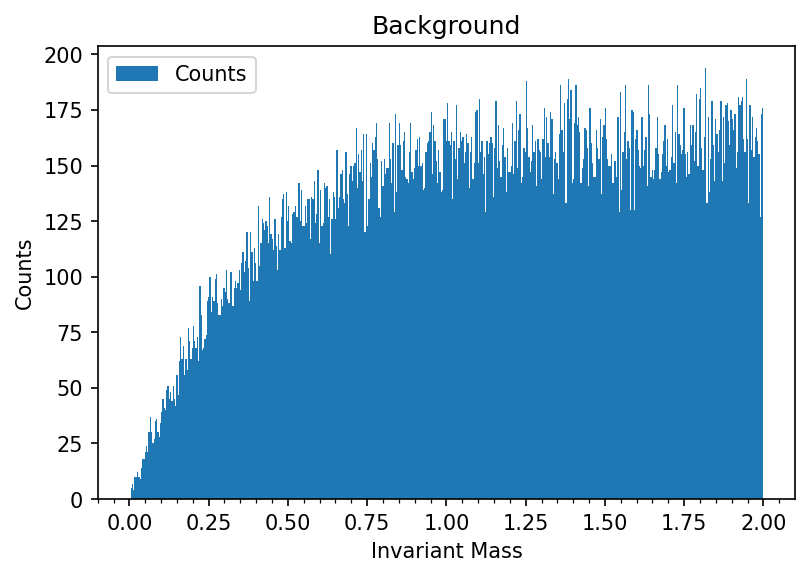

In [8]:
#Plot background
plt.figure(dpi=150)
counts_bg,bins,ignored= plt.hist(bg,bins, label='Counts')

plt.xlabel('Invariant Mass')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)
#plt.xlim(0,5)

plt.title('Background')
plt.legend()
plt.show()

In [9]:
#Use the range of invariant mass where we are sure there is no signal to renormalise the signal+background histogram
sum_sg= np.sum(counts_sg[np.logical_and(bins>0.2,bins<2)[1:]])
sum_bg= np.sum(counts_bg[np.logical_and(bins>0.2,bins<2)[1:]])

counts_sg_renorm= counts_sg*sum_bg/sum_sg

#Subtract the background from the signal
counts_new= counts_sg_renorm-counts_bg

In [10]:
#Define a Gaussian function for fitting
def Gauss(x, a, x0, sigma, H):
    return H+a*np.exp(-(x-x0)**2/(2*sigma**2))

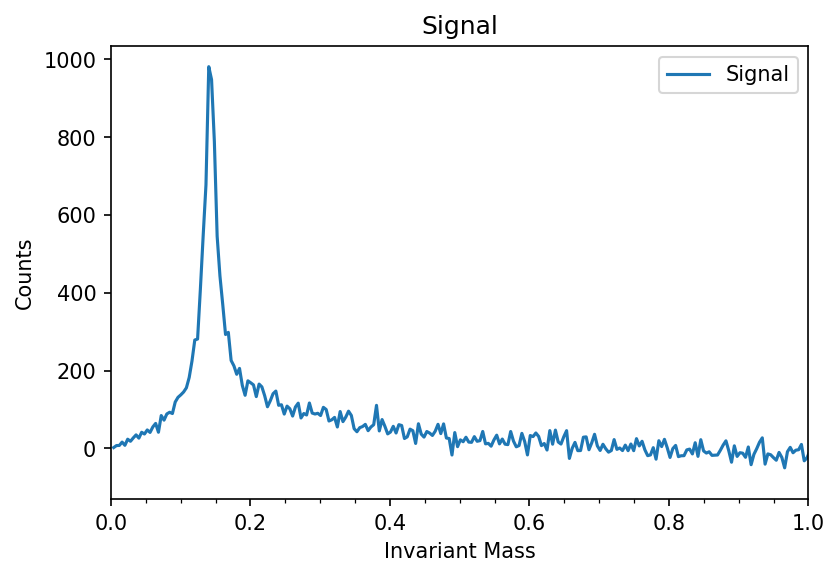

In [11]:
#Plot signal
x_new=bins[1:]
plt.figure(dpi=150)
#plt.plot(bins[1:],counts_new, 'o', label='data')
plt.plot(x_new,counts_new,label='Signal')

plt.xlabel('Invariant Mass')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)
plt.xlim(0,1)

plt.title('Signal')
plt.legend()
plt.show()

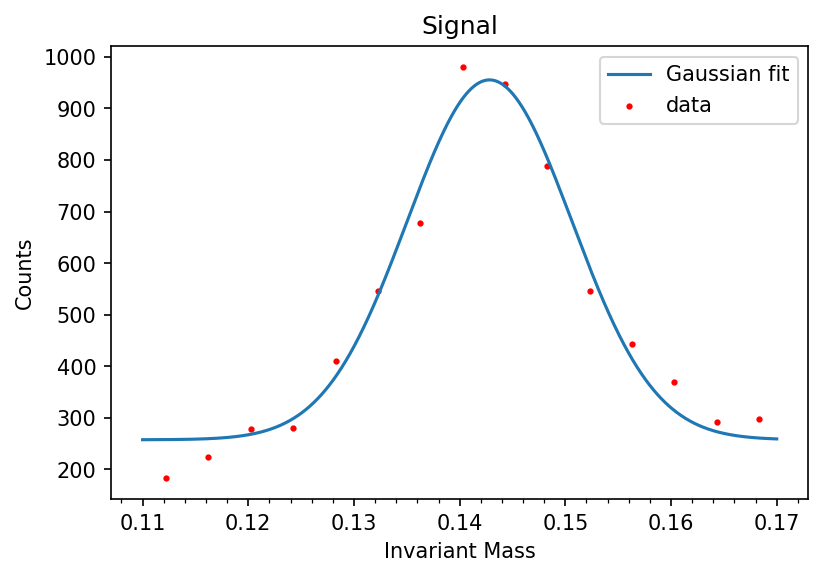

In [12]:
indices=np.logical_and(x_new>0.11,x_new<0.17)
x_range=x_new[indices]
y_range=counts_new[indices]

param, cov = curve_fit(Gauss, x_range, y_range, p0=[1000,0.14,0.01,100])

x_gauss= np.linspace(0.11,0.17,1000)
fit_gauss = Gauss(x_gauss, param[0], param[1], param[2], param[3])

plt.figure(dpi=150)
plt.plot(x_gauss, fit_gauss, '-', label='Gaussian fit')
plt.scatter(x_range, y_range, s=4, label='data',color='red')

plt.xlabel('Invariant Mass')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)

plt.title('Signal')
plt.legend()
plt.show()

In [13]:
print("Width of Gaussian is: ", param[2])
print("Invariant Mass of Pion is: ", param[1])

Width of Gaussian is:  0.007805457483339767
Invariant Mass of Pion is:  0.14282404232768953
